In [25]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


In [26]:
def onehot_encoder(y):
    Y_truth = np.zeros((y.shape[0], np.max(y))).astype(int)
    Y_truth[range(y.shape[0]), y - 1] = 1
    return Y_truth

In [27]:
images= np.loadtxt("hw02_data_set_images.csv",delimiter = ",") 
labels = np.loadtxt("hw02_data_set_labels.csv",).astype(int).reshape(195,1)
labels = np.squeeze(labels)
data = np.array(list(zip(images,labels))) # zipped together for further export

# extraction of data training and test sets from data
x_training = np.array([images[labels == c + 1][:25] for c in range(5)])
x_training = np.concatenate(np.squeeze(x_training))

test_x = np.array([images[labels == c + 1][25:] for c in range(5)])
test_x = np.concatenate(np.squeeze(test_x))


y_training = np.array([labels[labels == c +1][:25] for c in range(5)])
y_training = np.concatenate(np.squeeze(y_training))

test_y = np.array([labels[labels == c +1][25:] for c in range(5)])
test_y = np.concatenate(np.squeeze(test_y))


K = np.max(y_training)
y_training = onehot_encoder(y_training)



In [28]:
def sigmoid(W,w0,X):
    scores = np.matmul(np.hstack((X, np.ones((X.shape[0], 1)))), np.vstack((W, w0)))
    scores = 1/(1 + np.exp(-(scores)))    
    return scores


In [29]:
def predicter(scores):
    prediction = []
    for i in scores:
        prediction.append(np.argmax(i) + 1)
    return onehot_encoder(np.array(prediction))
    

In [30]:
def gradient_W(x,y_truth,y_pred):
    dZ = ((y_truth-y_pred) *(1-y_pred) * y_pred)
    
    return -np.matmul(x.T,dZ)
def gradient_w0(y_truth,y_pred):
    return np.asarray(-np.sum((y_truth -y_pred)*((1-y_pred)*y_pred),axis = 0,keepdims = True))

In [31]:
# set learning parameters
eta = 0.001
epsilon = 0.001

In [32]:
# randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (x_training.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))



In [33]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    
    scores = sigmoid(W,w0,x_training)
    y_predicted = scores
    
    objective_values = np.append(objective_values, 0.5 *np.sum(np.square(y_training - y_predicted)))

    W_old = W
    w0_old = w0
    dW = gradient_W(x_training, y_training, y_predicted)
    dw0 = gradient_w0(y_training, y_predicted)
    W = W - eta * gradient_W(x_training, y_training, y_predicted)
    w0 = w0 - eta * gradient_w0(y_training,y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1

print(W)
print(w0)

[[-0.007313   -0.04365135 -0.02283699  0.11954214 -0.02471816]
 [-0.0772168   0.00808906 -0.11410913  0.19204372  0.02484684]
 [-0.08098001  0.06492251 -0.12291065  0.15759649  0.03581208]
 ...
 [ 0.04350351  0.12033443  0.03493316 -0.14106721 -0.11477042]
 [ 0.05483368 -0.15529821  0.04138291 -0.18311856 -0.01104428]
 [ 0.07461121 -0.23759405  0.09797277 -0.15343788 -0.01975529]]
[[-0.04886843 -0.17238056 -0.01419691 -0.03881936 -0.16691034]]


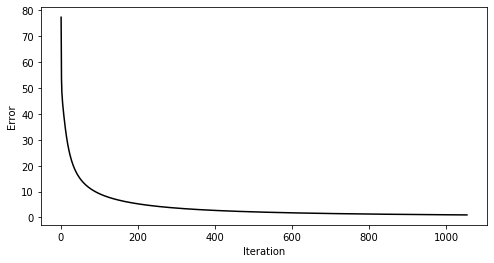

In [34]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [35]:
# calculate confusion matrix
y_predicted = np.argmax(y_predicted, axis = 1) + 1
y_truth = np.argmax(y_training, axis = 1) + 1


confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


In [36]:
y_predicted = np.argmax(sigmoid(W,w0,test_x),axis = 1) +1
y_truth = test_y
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ["y_pred"], colnames = ["y_truth"])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   1
3         0   0  14   0   0
4         0   0   0  14   0
5         0   2   0   0  13
